# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

Observations:

1) The dataset randomly selected more number of cities from Northern Hemisphere than the Southern Hemisphere. If we look at the map, Northern Hemisphere is more populated (more countries/continents fall in that zone).
2) Among the weather conditions, Temperature is the only one that correlates (directly or indirectly) with Latitude. Others like, Wind Speed, Humidity(%) and Cloudiness(%) have less to no correlation.
3) Temperature is higher near the Equator (0 degree latitude) based on our analysis (the correlation between Temp and Latitude).

In [1]:
%matplotlib inline

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import csv
import requests
import time
import datetime
import scipy.stats as st
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Assigning Variables

New_Cities = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lng = []
Temp = []
Wind = []

In [5]:
Record_counter = 0
Set_counter = 1
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

print('Beginning Data Retrieval\n-----------------------------')

for city in cities:
    new_url = base_url + "&q=" + city
    response = requests.get(new_url)
    data= response.json()
    if Record_counter < 50:
        Record_counter += 1
    else:
        Set_counter += 1
        Record_counter = 0

    print('Processing Record {} of Set {} | {}'.format(Record_counter, Set_counter, city))
    try:
        Cloudiness.append(data['clouds']['all'])
        Country.append(data['sys']['country'])
        Date.append(data['dt'])
        Humidity.append(data['main']['humidity'])
        Lat.append(data['coord']['lat'])
        Lng.append(data['coord']['lon'])
        Temp.append(data['main']['temp_max'])
        Wind.append(data['wind']['speed'])
        New_Cities.append(city)
    except:
        print('City not found. Skipping...')

print('-------------------------\nData Retrieval Complete\n-------------------------')


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 2 of Set 1 | gazanjyk
Processing Record 3 of Set 1 | inhambane
Processing Record 4 of Set 1 | ribeira grande
Processing Record 5 of Set 1 | bengkulu
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | tongliao
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | hofn
Processing Record 10 of Set 1 | ialibu
Processing Record 11 of Set 1 | yellowknife
Processing Record 12 of Set 1 | nikolskoye
Processing Record 13 of Set 1 | benjamin constant
Processing Record 14 of Set 1 | severo-kurilsk
Processing Record 15 of Set 1 | kazalinsk
City not found. Skipping...
Processing Record 16 of Set 1 | hermanus
Processing Record 17 of Set 1 | new norfolk
Processing Record 18 of Set 1 | darhan
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | kapaa
Processing Record 21 of Set 1 | albany
Process

Processing Record 38 of Set 4 | karauzyak
City not found. Skipping...
Processing Record 39 of Set 4 | port lincoln
Processing Record 40 of Set 4 | cockburn town
Processing Record 41 of Set 4 | kaitangata
Processing Record 42 of Set 4 | ostrovnoy
Processing Record 43 of Set 4 | victoria
Processing Record 44 of Set 4 | airai
Processing Record 45 of Set 4 | andevoranto
City not found. Skipping...
Processing Record 46 of Set 4 | yaan
Processing Record 47 of Set 4 | zhigansk
Processing Record 48 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 49 of Set 4 | evanston
Processing Record 50 of Set 4 | iqaluit
Processing Record 0 of Set 5 | poum
Processing Record 1 of Set 5 | conceicao da barra
Processing Record 2 of Set 5 | bay roberts
Processing Record 3 of Set 5 | markala
Processing Record 4 of Set 5 | chumikan
Processing Record 5 of Set 5 | kloulklubed
Processing Record 6 of Set 5 | talnakh
Processing Record 7 of Set 5 | alofi
Processing Record 8 of Set 5 | kon tum
Proces

Processing Record 24 of Set 8 | igarka
Processing Record 25 of Set 8 | russell
Processing Record 26 of Set 8 | turka
Processing Record 27 of Set 8 | tazmalt
Processing Record 28 of Set 8 | bima
Processing Record 29 of Set 8 | sidi ali
Processing Record 30 of Set 8 | tambun
Processing Record 31 of Set 8 | bosaso
Processing Record 32 of Set 8 | cayenne
Processing Record 33 of Set 8 | tabarqah
City not found. Skipping...
Processing Record 34 of Set 8 | morros
Processing Record 35 of Set 8 | nakonde
Processing Record 36 of Set 8 | high level
Processing Record 37 of Set 8 | flinders
Processing Record 38 of Set 8 | lebu
Processing Record 39 of Set 8 | glenwood springs
Processing Record 40 of Set 8 | najran
Processing Record 41 of Set 8 | qaqortoq
Processing Record 42 of Set 8 | kemijarvi
Processing Record 43 of Set 8 | yanji
Processing Record 44 of Set 8 | schruns
Processing Record 45 of Set 8 | luba
Processing Record 46 of Set 8 | pokrovsk
Processing Record 47 of Set 8 | drumnadrochit
Proce

Processing Record 6 of Set 12 | uusikaupunki
Processing Record 7 of Set 12 | xuanzhou
Processing Record 8 of Set 12 | abu dhabi
Processing Record 9 of Set 12 | calama
Processing Record 10 of Set 12 | ilam
Processing Record 11 of Set 12 | balabac
Processing Record 12 of Set 12 | ibra
Processing Record 13 of Set 12 | saint anthony
Processing Record 14 of Set 12 | pacifica
Processing Record 15 of Set 12 | port hardy
Processing Record 16 of Set 12 | okandja
City not found. Skipping...
Processing Record 17 of Set 12 | grand river south east
City not found. Skipping...
Processing Record 18 of Set 12 | ketchikan
Processing Record 19 of Set 12 | marco
Processing Record 20 of Set 12 | palana
Processing Record 21 of Set 12 | anzio
Processing Record 22 of Set 12 | sogdiondon
City not found. Skipping...
Processing Record 23 of Set 12 | rosa zarate
Processing Record 24 of Set 12 | nova vodolaha
Processing Record 25 of Set 12 | dunmore east
Processing Record 26 of Set 12 | kalmunai
Processing Record

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather = {
    "City": New_Cities,
    "Cloudiness" : Cloudiness,
    "Country" : Country,
    "Date" : Date,
    "Humidity" : Humidity,
    "Temp": Temp,
    "Lat" : Lat,
    "Lng" : Lng,   
    "Wind Speed" : Wind
}
df = pd.DataFrame(weather)
df.count()

City          572
Cloudiness    572
Country       572
Date          572
Humidity      572
Temp          572
Lat           572
Lng           572
Wind Speed    572
dtype: int64

In [7]:
with open(output_data_file, 'w') as datafile:
    df.to_csv(output_data_file, index=False, header=True)

In [8]:
new_df = pd.read_csv("../output_data/cities.csv", )
new_df.head()

,City,Cloudiness,Country,Date,Humidity,Temp,Lat,Lng,Wind Speed
0,gazanjyk,74,TM,1584498120,80,48.00,39.24,55.52,6.20
1,inhambane,21,MZ,1584498022,73,73.49,-23.86,35.38,13.44
2,ribeira grande,50,PT,1584498120,89,58.17,38.52,-28.70,10.85
3,bengkulu,97,ID,1584497867,70,85.77,-3.80,102.27,2.10
4,punta arenas,75,CL,1584498121,66,53.60,-53.15,-70.92,24.16


In [9]:
timestamp = new_df['Date'][0]
date = datetime.datetime.fromtimestamp(timestamp).strftime('%Y-%m-%d')
print(date)

2020-03-17


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [10]:
df['Lat'].astype(np.float64)

0      39.24
1     -23.86
2      38.52
3      -3.80
4     -53.15
       ...  
567    51.03
568    -1.77
569    55.10
570    12.18
571    12.22
Name: Lat, Length: 572, dtype: float64

#### Latitude vs. Temperature Plot

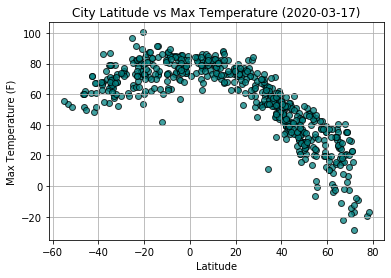

In [11]:
plt.scatter(weather['Lat'],weather['Temp'],color='teal',marker='o',alpha = 0.75, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs Max Temperature ({})'.format(date))
plt.grid()
plt.savefig(f"../output_data/City Latitude vs Max Temperature.png")

The above plot is analyzing the relationship between Latitude and the Temperatures in degree Farhenheit at those latitudes. As we see the Temperature seems to be higher near the equator (0 degree) and reduces past that (-20 farhenheit at 70 degree)

#### Latitude vs. Humidity Plot

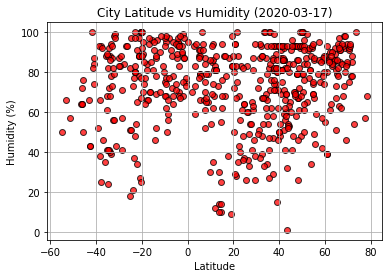

In [12]:
plt.scatter(weather['Lat'],weather['Humidity'],color='red',marker='o',alpha = 0.75, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs Humidity ({})'.format(date))
plt.grid()
plt.savefig(f"../output_data/City Latitude vs Humidity.png")

The above plot is analyzing the relationship between Latitude and Humidity (%) at those latitudes. As we see that Humidity is barely related to the latitude though there is slight concentration in the 40 to 80 degree latitude range where Humidity is above 80%.

#### Latitude vs. Cloudiness Plot

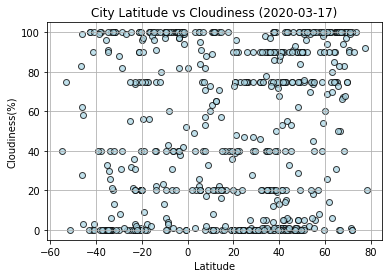

In [13]:
plt.scatter(weather['Lat'],weather['Cloudiness'],color='lightblue',marker='o',alpha = 0.75, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title('City Latitude vs Cloudiness ({})'.format(date))

plt.grid()
plt.savefig(f"../output_data/City Latitude vs Cloudiness.png")

The above plot is analyzing the relationship between Latitude and the Cloudiness (%) at those latitudes. As we see there is no correlation between the two variables as the plot is scattered almost evenly. this means that the Latitude does not impact the Cloudiness(%)



#### Latitude vs. Wind Speed Plot

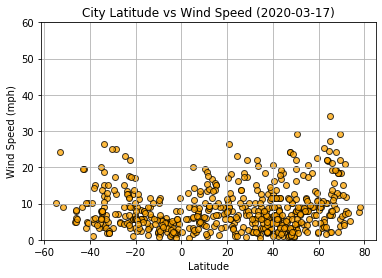

In [14]:
plt.scatter(weather['Lat'],weather['Wind Speed'],color='orange',marker='o',alpha = 0.75, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs Wind Speed ({})'.format(date))
plt.ylim(0,60)
plt.grid()
plt.savefig(f"../output_data/City Latitude vs Wind Speed.png")

The above plot is analyzing the relationship between Latitude and the Wind Speed (in mph) at those latitudes. As we see both these variables have almost no correlation. 

## Linear Regression

In [15]:
# Create Northern and Southern Hemisphere DataFrames

Northern_Hem = new_df.loc[new_df["Lat"] >= 0.0]
Northern_Hem.reset_index
Northern_Hem

,City,Cloudiness,Country,Date,Humidity,Temp,Lat,Lng,Wind Speed
0,gazanjyk,74,TM,1584498120,80,48.00,39.24,55.52,6.20
2,ribeira grande,50,PT,1584498120,89,58.17,38.52,-28.70,10.85
5,tongliao,55,CN,1584498142,32,54.03,43.61,122.27,16.89
7,hofn,100,IS,1584498017,89,37.38,64.25,-15.21,21.77
9,yellowknife,75,CA,1584498143,64,-4.00,62.46,-114.35,5.82
...,...,...,...,...,...,...,...,...,...
566,lompoc,20,US,1584498543,58,53.60,34.64,-120.46,5.82
567,teeli,76,RU,1584498543,91,28.96,51.03,90.23,2.01
569,la ronge,75,CA,1584498307,49,3.20,55.10,-105.28,2.24
570,san policarpo,65,PH,1584498544,81,80.10,12.18,125.51,9.22


In [16]:
Southern_Hem = new_df.loc[new_df["Lat"] < 0.0]
Southern_Hem.reset_index
Southern_Hem


,City,Cloudiness,Country,Date,Humidity,Temp,Lat,Lng,Wind Speed
1,inhambane,21,MZ,1584498022,73,73.49,-23.86,35.38,13.44
3,bengkulu,97,ID,1584497867,70,85.77,-3.80,102.27,2.10
4,punta arenas,75,CL,1584498121,66,53.60,-53.15,-70.92,24.16
6,busselton,6,AU,1584498142,39,69.01,-33.65,115.33,18.84
8,ialibu,40,PG,1584498143,64,73.40,-6.28,143.99,4.70
...,...,...,...,...,...,...,...,...,...
551,puerto suarez,9,BO,1584498538,85,76.44,-18.95,-57.80,4.32
554,moranbah,0,AU,1584498322,34,83.48,-22.00,148.05,17.45
555,uyuni,100,BO,1584498539,67,53.44,-20.46,-66.83,10.09
559,namanga,100,KE,1584498540,90,67.77,-2.54,36.79,0.63


In [26]:
# OPTIONAL: Create a function to create Linear Regression plots

def plotLinearRegression(x_values,y_values,x_label,y_label,label_position):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    print(f"The r-squared is: {rvalue}")
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_values,y_values, color='purple',marker='o',alpha = 0.75, edgecolors='black')
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,label_position,fontsize=14,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.savefig(f"../output_data/fig{label_position}.png")
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8950662082681822


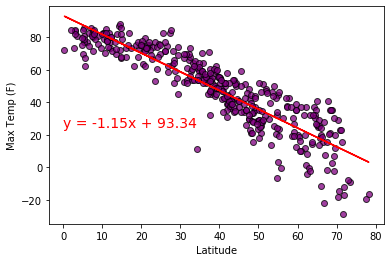

In [27]:
x_label = "Latitude"
y_label = "Max Temp (F)"
label_position = (0,25)
plotLinearRegression(Northern_Hem['Lat'],Northern_Hem['Temp'],x_label,y_label,label_position)

The linear regression is modelling the relationship between Latitude and Max Temperature (in degree farhenheit) at those latitudes in Northern Hemisphere (0 to 90 degree) by means of a slope. Here, there is negative correlation between the two variables. Higher the latitude degree, lower the temperatures and vice versa. This proves that temperatures are higher near the Equator (0 degree Latitude). The regions/cities near the Equator will have higher temperatures.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5111626024832976


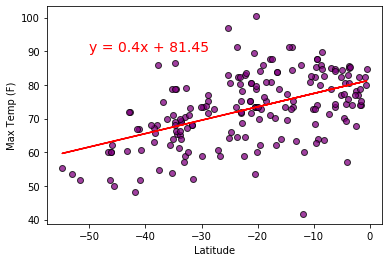

In [28]:
x_label = "Latitude"
y_label = "Max Temp (F)"
label_position = (-50,90)
plotLinearRegression(Southern_Hem['Lat'],Southern_Hem['Temp'],x_label,y_label,label_position)

The linear regression is modelling the relationship between Latitude and Max Temperature (in degree farhenheit) at those latitudes in Southern Hemisphere (0 to -90 degree) by means of a slope. Here, there is positive correlation between the two variables. Lower the latitude degree, lower the temperatures and vice versa. This proves that temperatures are higher near the Equator (0 degree Latitude). The regions/cities near the Equator will have higher temperatures. We also see that 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.20076924149223485


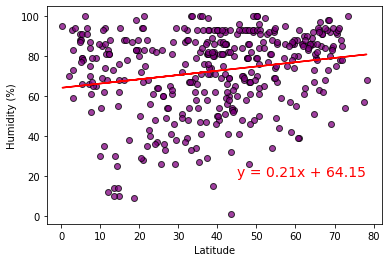

In [29]:
x_label = "Latitude"
y_label = "Humidity (%)"
label_position = (45,20)
plotLinearRegression(Northern_Hem['Lat'],Northern_Hem['Humidity'],x_label,y_label,label_position)

The linear regression is modelling the relationship between Latitude and Humidity (%) at those latitudes in Northern Hemisphere (0 to 90 degree) by means of a slope. Here, there is positive correlation between the two variables. We can also observe that the Humidity (%) is higher as the latitude increases and there may be less Humidity(%) near Equator

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.30138563414157005


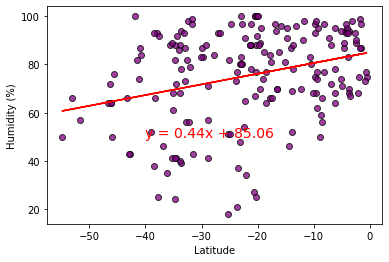

In [30]:
x_label = "Latitude"
y_label = "Humidity (%)"
label_position = (-40,50)
plotLinearRegression(Southern_Hem['Lat'],Southern_Hem['Humidity'],x_label,y_label,label_position)

The linear regression is modelling the relationship between Latitude and Humidity (%) at those latitudes in Southern Hemisphere (0 to -90 degree) by means of a slope. We see here that the humidity(%) is higher near the Equator (0 degree latitude). As we approach the South Polar region (-50 to -90 degree latitude) we see less Humidity (%).

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.2415153508647019


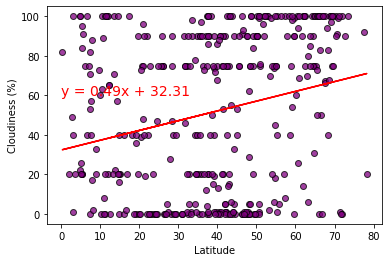

In [31]:
x_label = "Latitude"
y_label = "Cloudiness (%)"
label_position = (0,60)
plotLinearRegression(Northern_Hem['Lat'],Northern_Hem['Cloudiness'],x_label,y_label,label_position)

The linear regression is modelling the relationship between Latitude and CLoudiness (%) at those latitudes in Northern Hemisphere (0 to 90 degree) by means of a slope. Here we see, there is barely correlation with r-squared at 0.14. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.22174025580813764


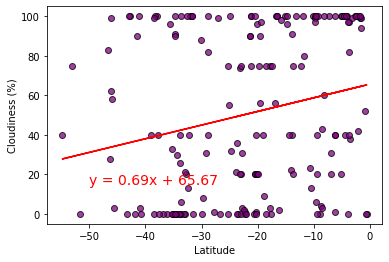

In [32]:
x_label = "Latitude"
y_label = "Cloudiness (%)"
label_position = (-50,15)
plotLinearRegression(Southern_Hem['Lat'],Southern_Hem['Cloudiness'],x_label,y_label,label_position)

The linear regression is modelling the relationship between Latitude and Cloudiness (%) at those latitudes in Southern Hemisphere (0 to -90 degree) by means of a slope. We see here that the Cloudiness (%) is higher near the Equator (0 degree latitude).

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.16127110626148838


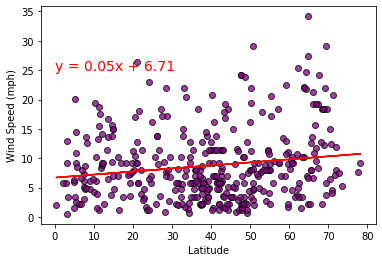

In [33]:
x_label = "Latitude"
y_label = "Wind Speed (mph)"
label_position = (0,25)
plotLinearRegression(Northern_Hem['Lat'],Northern_Hem['Wind Speed'],x_label,y_label,label_position)

The linear regression is modelling the relationship between Latitude and Wind Speed (mph) at those latitudes in Northern Hemisphere (0 to 90 degree) by means of a slope. We see here that the Wind Speed (mph) is not different given any latitude.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.38788915046678174


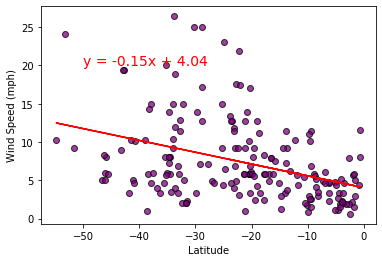

In [34]:
x_label = "Latitude"
y_label = "Wind Speed (mph)"
label_position = (-50,20)
plotLinearRegression(Southern_Hem['Lat'],Southern_Hem['Wind Speed'],x_label,y_label,label_position)

The linear regression is modelling the relationship between Latitude and Wind Speed (mph) at those latitudes in Southern Hemisphere (0 to -90 degree) by means of a slope. We see here that the Wind Speed (mph) is lower near the Equator (0 degree latitude) as opposed to the latitude nearing towards the South Pole.